## Based on work from [Chechik et al., 1998.](https://www-mitpressjournals-org.proxy.lib.duke.edu/doi/pdf/10.1162/089976698300017124)

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

In [414]:
def hopfield_model_synaptic_deletion_min_val(mem, neu, tim, threshold):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ## min val deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if np.abs(z[i][j]) > t:
                z[i][j] = z[i][j]
            elif z[i][j] == t:
                z[i][j] = 0
            else:
                z[i][j] = 0
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
            
    #get the number of zeros that resulted in the Wij connectivity matrix following this pruning step
    counts = np.unique(Wij, return_counts = True)       
    zeros = counts[1][counts[0] == 0]        
            
    return(m_overlap.take(0, axis = 1)[1], zeros)

In [415]:
def hopfield_model_synaptic_deletion_compressed(mem, neu, tim, threshold):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ##compressed deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if np.abs(z[i][j]) <= t:
                z[i][j] = 0
            elif z[i][j] > t:
                z[i][j] = z[i][j] - t
            elif z[i][j] < -t:
                z[i][j] = z[i][j] + t
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    #get the number of zeros that resulted in the Wij connectivity matrix following this pruning step
    counts = np.unique(Wij, return_counts = True)       
    zeros = counts[1][counts[0] == 0]        
            
    return(m_overlap.take(0, axis = 1)[1], zeros)

In [416]:
def hopfield_model_synaptic_deletion_clipping(mem, neu, tim, threshold):

    import numpy as np
    import copy
    
    M = mem #number of memories
    N = neu #number of neurons
    timesteps = tim #number of timesteps for the simulation


    #creating patterns
    patterns = np.empty(shape = (M, N))
    for m in range(M):
        patterns[m] = np.random.choice([-1, 1], N)


    #creating the initial connectivity matrix based on a sum of the patterns - THIS SEEMS TO BE THE BOTTLENECK
    connectivity = np.zeros(shape = (N, N))
    for m in range(M):
        connectivity += np.outer(patterns[m], patterns[m].T)
    for i in range(N):
        connectivity[i][i] = 0
    
    Wij = connectivity / np.sqrt(M)
    z = Wij.copy()
    t = threshold
    
    ##clipping modification/deletion
    for i in range(len(z)):
        for j in range(len(z)):
            if z[i][j] > t:
                z[i][j] = 1
            elif z[i][j] < -t:
                z[i][j] = -1
            else:
                z[i][j] = 0
    
    #set the connectivity matrix to the modified/deleted synaptic values
    Wij = z.copy()

    #want an initial overlap of 0.8
    X = np.zeros(shape = (timesteps, N))
    X[0] = patterns[0].copy()
    n_change = int(X[0].shape[0] * 0.1)
    X[0][1:n_change] = -X[0][1:n_change]
    
    
    #update the model for every timestep based on its sign
    for t in range(timesteps - 1):
        X[t+1,:] = np.sign(Wij.dot(X[t,:]))

    #create an array to hold the overlap percentages   
    m_overlap = np.empty(shape = (timesteps, M))
    mu = []

    #calculate overlap percentages
    for t in range(timesteps):
        for u in range(M):
            mu = []
            for j in range(N):
                mu = np.append(mu, patterns[u][j] * X[t][j])
            m_overlap[t][u] = ((1/N) * mu.sum())
            
    #get the number of zeros that resulted in the Wij connectivity matrix following this pruning step
    counts = np.unique(Wij, return_counts = True)       
    zeros = counts[1][counts[0] == 0]        
            
    return(m_overlap.take(0, axis = 1)[1], zeros)

In [417]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_min_val(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 34min 59s


In [418]:
min_val1 = memory.copy()
min_val_x1 = x.copy()

In [419]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_min_val(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 36min 57s


In [420]:
min_val2 = memory.copy()
min_val_x2 = x.copy()

In [421]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_min_val(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 35min


In [422]:
min_val3 = memory.copy()
min_val_x3 = x.copy()

In [423]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_compressed(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 37min 52s


In [424]:
compressed1 = memory.copy()
compressed_x1 = x.copy()

In [425]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_compressed(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 34min 14s


In [426]:
compressed2 = memory.copy()
compressed_x2 = x.copy()

In [427]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_compressed(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 35min 49s


In [428]:
compressed3 = memory.copy()
compressed_x3 = x.copy()

In [429]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_clipping(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 17min 10s


In [430]:
clipping1 = memory.copy()
clipping_x1 = x.copy()

In [431]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_clipping(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 17min 11s


In [432]:
clipping2 = memory.copy()
clipping_x2 = x.copy()

In [433]:
%%time

del_levels = np.arange(0, 1.5, .1)

x = np.ones(shape = (len(del_levels), 2))
memory = np.zeros(shape = len(del_levels))
i = -1


for lvl in del_levels:
    i = i + 1
    while x[i][0] > .95:
        memory[i] = memory[i] + 1
        x[i] = hopfield_model_synaptic_deletion_clipping(mem = int(memory[i]), neu = 800, tim = 2, threshold = 0 + lvl)

Wall time: 17min 16s


In [434]:
clipping3 = memory.copy()
clipping_x3 = x.copy()

In [488]:
min_val = np.concatenate((min_val1, min_val2, min_val3))
compressed = np.concatenate((compressed1, compressed2, compressed3))
clipping = np.concatenate((clipping1, clipping2, clipping3))

In [489]:
df = pd.DataFrame({'min_val':min_val, 'compressed':compressed, 'clipping':clipping})

In [490]:
df

,min_val,compressed,clipping
0,107.0,124.0,77.0
1,110.0,118.0,85.0
2,113.0,112.0,90.0
3,119.0,110.0,87.0
4,119.0,108.0,90.0
5,110.0,108.0,93.0
6,107.0,96.0,96.0
7,99.0,106.0,101.0
8,92.0,102.0,93.0
9,97.0,96.0,91.0


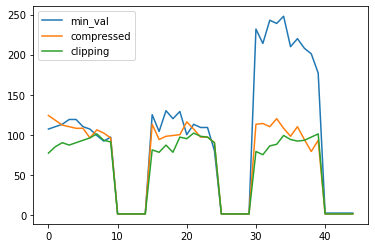

In [491]:
df.plot();

In [472]:
for i in range(len(clipping_x1)):
    clipping_x = np.append(clipping_x, clipping_x3[i][1])

In [474]:
clipping_x

array([   800.,    800.,  54610., 108876., 159318., 206700., 249368.,
       367610., 379514., 383206., 640000., 640000., 640000., 640000.,
       640000.,    800.,  58394., 109178., 170130., 202140., 204094.,
       327302., 333176., 373092., 420302., 640000., 640000., 640000.,
       640000., 640000.,    800.,    800.,  55464., 160804., 200914.,
       252034., 254846., 299254., 373634., 434864., 640000., 640000.,
       640000., 640000., 640000.])

In [446]:
min_val_x = x.copy()

In [464]:
min_val_x

array([   800.,  48778.,  96586., 183470., 182920., 235136., 280102.,
       290514., 341546., 374692., 640000., 640000., 640000., 640000.,
       640000.,    800.,  50432., 133406., 138586., 177478., 245618.,
       272684., 356664., 356804., 438966., 640000., 640000., 640000.,
       640000., 640000.,  51178., 101770., 142042., 144836., 194774.,
       229752., 307106., 320266., 377592., 418260., 640000., 640000.,
       640000., 640000., 640000.])

In [463]:
compressed_x

array([ 46402.,  47026., 143516., 144800., 236900., 237926., 250260.,
       322828., 402136., 411572., 640000., 640000., 640000., 640000.,
       640000.,    800.,  53372.,  52568., 102628., 243886., 229632.,
       279314., 294042., 372962., 420878., 640000., 640000., 640000.,
       640000., 640000.,    800.,  48782., 144610., 137398., 236828.,
       247332., 317808., 340612., 404872., 379654., 640000., 640000.,
       640000., 640000., 640000.])

In [475]:
df_x = pd.DataFrame({'min_val_x': min_val_x, 'compressed_x':compressed_x, 'clipping_x':clipping_x})

In [476]:
df_x

,min_val_x,compressed_x,clipping_x
0,800.0,46402.0,800.0
1,48778.0,47026.0,800.0
2,96586.0,143516.0,54610.0
3,183470.0,144800.0,108876.0
4,182920.0,236900.0,159318.0
5,235136.0,237926.0,206700.0
6,280102.0,250260.0,249368.0
7,290514.0,322828.0,367610.0
8,341546.0,402136.0,379514.0
9,374692.0,411572.0,383206.0


In [504]:
df['min_val_x'] = df_x['min_val_x']
df['clipping_x'] = df_x['clipping_x']
df['compressed_x'] = df_x['compressed_x']

In [506]:
df.sort_values(by = ['min_val_x','clipping_x', 'compressed_x'])

,min_val,compressed,clipping,min_val_x,clipping_x,compressed_x
15,125.0,113.0,81.0,800.0,800.0,800.0
0,107.0,124.0,77.0,800.0,800.0,46402.0
1,110.0,118.0,85.0,48778.0,800.0,47026.0
16,104.0,94.0,78.0,50432.0,58394.0,53372.0
30,232.0,113.0,79.0,51178.0,800.0,800.0
2,113.0,112.0,90.0,96586.0,54610.0,143516.0
31,214.0,114.0,75.0,101770.0,800.0,48782.0
17,130.0,98.0,87.0,133406.0,109178.0,52568.0
18,120.0,99.0,78.0,138586.0,170130.0,102628.0
32,243.0,110.0,86.0,142042.0,55464.0,144610.0


In [513]:
df['min_val_normalized'] = (df['min_val_x']/(df['min_val_x'].max()) * 100)
df['clipping_normalized'] = (df['clipping_x']/(df['clipping_x'].max()) * 100)
df['compressed_normalized'] = (df['compressed_x']/(df['compressed_x'].max()) * 100)

In [520]:
t = np.concatenate((np.arange(0, 1.5, 0.1), np.arange(0, 1.5, 0.1), np.arange(0, 1.5, 0.1)))

In [521]:
df['threshold'] = t

In [524]:
df.set_index('threshold', inplace = True)

In [526]:
df.to_csv('C:\\Users\\Minecraft in 4K\\Dropbox\\spr_2020_classes\\quant_neurobio\\final_results.csv')

In [527]:
df

,min_val,compressed,clipping,min_val_x,clipping_x,compressed_x,min_val_normalized,clipping_normalized,compressed_normalized
threshold,,,,,,,,,
0.0,107.0,124.0,77.0,800.0,800.0,46402.0,0.125000,0.125000,7.250312
0.1,110.0,118.0,85.0,48778.0,800.0,47026.0,7.621562,0.125000,7.347813
0.2,113.0,112.0,90.0,96586.0,54610.0,143516.0,15.091563,8.532813,22.424375
0.3,119.0,110.0,87.0,183470.0,108876.0,144800.0,28.667188,17.011875,22.625000
0.4,119.0,108.0,90.0,182920.0,159318.0,236900.0,28.581250,24.893438,37.015625
0.5,110.0,108.0,93.0,235136.0,206700.0,237926.0,36.740000,32.296875,37.175938
0.6,107.0,96.0,96.0,280102.0,249368.0,250260.0,43.765937,38.963750,39.103125
0.7,99.0,106.0,101.0,290514.0,367610.0,322828.0,45.392813,57.439063,50.441875
0.8,92.0,102.0,93.0,341546.0,379514.0,402136.0,53.366563,59.299062,62.833750


In [529]:
df_min_val = pd.DataFrame({'minval1':min_val1, 'minval2':min_val2, 'minval3': min_val3})

In [553]:
min_val_mean = []
min_val_x_mean = []

for i in range(len(min_val1)):
    min_val_mean = np.append(min_val_mean, np.mean([min_val1[i], min_val2[i], min_val3[i]]))
    
for i in range(len(min_val_x1)):
    min_val_x_mean = np.append(min_val_x_mean, np.mean([min_val_x1[i][1], min_val_x2[i][1], min_val_x3[i][1]]))

In [555]:
min_val_mean, min_val_x_mean

(array([154.66666667, 142.66666667, 162.        , 159.33333333,
        165.33333333, 140.        , 146.66666667, 138.66666667,
        134.        , 118.        ,   1.33333333,   1.33333333,
          1.33333333,   1.33333333,   1.33333333]),
 array([ 17592.66666667,  66993.33333333, 124011.33333333, 155630.66666667,
        185057.33333333, 236835.33333333, 286630.66666667, 322481.33333333,
        358647.33333333, 410639.33333333, 640000.        , 640000.        ,
        640000.        , 640000.        , 640000.        ]))

In [556]:
compressed_mean = []
compressed_x_mean = []

for i in range(len(compressed1)):
    compressed_mean = np.append(compressed_mean, np.mean([compressed1[i], compressed2[i], compressed3[i]]))
    
for i in range(len(compressed_x1)):
    compressed_x_mean = np.append(compressed_x_mean, np.mean([compressed_x1[i][1], compressed_x2[i][1], compressed_x3[i][1]]))

In [557]:
compressed_mean, compressed_x_mean

(array([116.66666667, 108.66666667, 106.66666667, 109.66666667,
        105.33333333, 107.33333333, 104.33333333,  99.        ,
         92.66666667,  93.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ]),
 array([ 16000.66666667,  49726.66666667, 113564.66666667, 128275.33333333,
        239204.66666667, 238296.66666667, 282460.66666667, 319160.66666667,
        393323.33333333, 404034.66666667, 640000.        , 640000.        ,
        640000.        , 640000.        , 640000.        ]))

In [559]:
clipping_mean = []
clipping_x_mean = []

for i in range(len(clipping1)):
    clipping_mean = np.append(clipping_mean, np.mean([clipping1[i], clipping2[i], clipping3[i]]))
    
for i in range(len(clipping_x1)):
    clipping_x_mean = np.append(clipping_x_mean, np.mean([clipping_x1[i][1], clipping_x2[i][1], clipping_x3[i][1]]))

In [560]:
clipping_mean, clipping_x_mean

(array([79.        , 79.33333333, 87.66666667, 84.33333333, 95.33333333,
        94.        , 96.66666667, 97.33333333, 95.66666667, 94.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]),
 array([   800.        ,  19998.        ,  73084.        , 146603.33333333,
        187457.33333333, 220942.66666667, 277172.        , 333346.66666667,
        375413.33333333, 412790.66666667, 640000.        , 640000.        ,
        640000.        , 640000.        , 640000.        ]))

In [565]:
n_mem = np.concatenate([min_val_mean, compressed_mean, clipping_mean])
n_syn_deleted = np.concatenate([min_val_x_mean, compressed_x_mean, clipping_x_mean])

In [566]:
df_cleaned = pd.DataFrame({'n_mem':n_mem, 'n_syn_deleted':n_syn_deleted})

In [574]:
names = np.concatenate([np.repeat('min_val', len(min_val_mean)), np.repeat('compressed', len(compressed_mean)), np.repeat('clipping', len(clipping_mean))])

In [576]:
df_cleaned['del_type'] = names

In [578]:
df_cleaned['del_level'] = 100*(df_cleaned['n_syn_deleted']/df_cleaned['n_syn_deleted'].max())

In [580]:
df_cleaned.to_csv('C:\\Users\\Minecraft in 4K\\Dropbox\\spr_2020_classes\\quant_neurobio\\final_results_meam_tidy.csv')